# **Backpacker to Tokyo**

## Capstone Project The Battle of Neighborhood : Where to Stay When You Travel to Tokyo?

Author : Miftachul Umam

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project, I will try to find an optimal location to stay on vacation. Specifically, this report will be targeted to low budget travelers or backpackers are interested in a vacation to Tokyo Japan. Multinational consulting firm Mercer’s 2020 Cost of Living Survey has determined that Tokyo comes in third for the most expensive city in the world. We need advice before going on vacation to Tokyo.

According to www.travelandleisure.com Tokyo is one of the most well-connected cities on the planet in terms of transportation. The best time to visit Tokyo is in the fall and spring when temperatures are temperate and the scenery is stunning. Both cherry blossom season and autumn foliage season are excellent times to visit. Many festivals take place during July when Mount Fuji is also open for climbing.

Tokyo is a dizzying whirl of activity: you can practically feel its pulse, with the neon signs, the crush of people, and the perfectly punctual, high-speed trains whizzing by. Then there’s a pause, a bit of green and calm on the city’s temple grounds or classical gardens. 

Navigating the world’s largest metropolis—home to more than 13 million people—can be a daunting prospect for visitors. Tokyo’s maze of neighborhoods seems to offer up every imaginable sight and sound—some of them cacophonous and modern (speeding bullet trains; herds of hurrying, be-suited businessmen; bizarrely futuristic toilets), and some of the ancient (Buddhist shrines and temples; the waddling combat of sumo wrestlers). The trick here is to explore one enclave at a time; for instance, starting in Ginza or Shibuya for shopping, then heading to Shinjuku or Roppongi for nightlife.

Since there are lots of Hotel in Tokyo we will try to detect **the best price of hotels** based on http://insideairbnb.com/

We will use our data science powers to generate a few most promising neighborhoods based on these criteria. The advantages of each area will then be clearly expressed so that the best possible final location can be chosen by the backpacker. We got 102 Data of neighborhoods from https://en.wikipedia.org/wiki/Category:Neighborhoods_of_Tokyo 

Using data science methodology and machine learning techniques like clustering, this project aims to provide solutions to answer the question: In the city of Tokyo, if a traveler is looking to stay on vacation, where would you recommend that they stay?

## Data

Based on the definition of our problem, the factors that will influence our decision are:
* The list data of neighborhoods.
* Latitude and longitude coordinates of those neighborhoods. This is required to plot the map and also to get the venue data.
* Dataset of rating and price of existing hotels in the neighborhoods. We will use this data to perform clustering on the neighborhoods.
* Number of venues including tourist attractions, restaurants, and shopping malls in the neighborhood.

Following data sources will be needed to extract/generate the required information:

I will get the list of neighborhoods in Tokyo from Wikipedia. I will use web scraping techniques to extract the data from the Wikipedia page, with the help of Python requests and pandas packages. Then we can get the latitude and longitude coordinates of the neighborhoods using the Python Geocoder package. 

Airbnb Inside will provide many categories of rating and price of an existing hotel in the neighborhoods and Foursquare API will provide many categories of the venue data, and we are particularly interested in the tourist attractions category to help us clustering the neighborhoods. This project will make us use many of data science skills, from web scraping (Wikipedia), working with API (Foursquare), data cleaning, data wrangling, to machine learning (K-means clustering) and map visualization (Folium).


## Methodology

* Perform scraping using Python requests and beautifulsoup packages to extract the list of neighborhood data.
* Download data inside from AirBnB for getting the data of accommodations, Then, we will randomly choose 1000 accommodations. In this case, I got other data of neighborhoods name by Airbnb that different from the Wikipedia, then I consider using AirBnB neighborhood data because I have struggled to group based on haversine formula to merging the Wikipedia's data and Airbnb's data. I don't clean the data of the neighborhood based on Wikipedia data for ideation the next project. 
* After that, we will use Foursquare API to obtain information on venues nearby to our top 1000 accommodations. In our final step, we will cluster our accommodations with k-means clustering and provide recommendations to travelers.
* Using The Foursquare API allows application developers to interact with the Foursquare platform. The API itself is a RESTful set of addresses to which you can send requests, so there’s nothing to download onto your server. 



## Analysis

### Data Preparation

#### Install all of required packages 

In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install geopy
!pip install geocoder
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 8.0MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 18.8MB/s eta 0:00:01     |█████▊                          | 993kB 18.8MB/s eta 0:00:01
     |████████████████████████████████| 112kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 102kB 6.3MB/s ta 0:00:011
     |████████████████████████████████| 829kB 8.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package 

### Neighborhood Data

#### Let's scraping the neighborhood data from wikipedia

In [2]:
# Send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_of_Tokyo").text
# Parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')
# Create a list to store neighbourhood data
neighborhoodList = []
# Append the data into the list
for row in soup.find_all("div", id="mw-pages")[0].findAll("li"):
  neighborhoodList.append(row.text)
# Create a new DataFrame from the list
Tokyo_df = pd.DataFrame({"Neighborhood": neighborhoodList})
Tokyo_df


,Neighborhood
0,Agariyashiki
1,Akihabara
2,"Aoyama, Tokyo"
3,"Arai, Tokyo"
4,Asagaya
...,...
97,Yotsuya
98,Yoyogi
99,Yoyogikamizonochō
100,Yūrei zaka


#### Let's get the geographical coordinates of the neighborhoods using the Geocoder package

In [3]:
import geocoder
# Defining a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Tokyo, Japan'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in Tokyo_df["Neighborhood"].tolist()]
coords

[[35.72646208300006, 139.7051560540001],
 [35.702170840000065, 139.7744091400001],
 [35.68945633000004, 139.6917160900001],
 [35.68945633000004, 139.6917160900001],
 [35.704890000000034, 139.6362600000001],
 [35.69197253400006, 139.7414457110001],
 [35.69959896000006, 139.67506014000003],
 [35.65076536000004, 139.70468298000003],
 [35.658362440000076, 139.69791276],
 [35.64532595000003, 139.7165050200001],
 [35.64466222000004, 139.70816845000002],
 [35.64845099000007, 139.70606734000012],
 [35.689780760000076, 139.7340734400001],
 [35.651806760000056, 139.69809175000012],
 [35.68945633000004, 139.6917160900001],
 [35.67771698000007, 139.70633101900012],
 [35.67795733000003, 139.6858345500001],
 [35.674993474000075, 139.75956009000004],
 [35.65380213000003, 139.71012802000007],
 [35.748591660000045, 139.58732147000012],
 [35.652052350000076, 139.7175139100001],
 [35.69257497000007, 139.75741702000005],
 [35.75654117000005, 139.46953437000002],
 [35.66186617000005, 139.32580599000005],
 

In [4]:
# Create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
# Merge the coordinates into the original dataframe
Tokyo_df['Latitude'] = df_coords['Latitude']
Tokyo_df['Longitude'] = df_coords['Longitude']
print(Tokyo_df.shape)
Tokyo_df.head()


(102, 3)


,Neighborhood,Latitude,Longitude
0,Agariyashiki,35.726462,139.705156
1,Akihabara,35.702171,139.774409
2,"Aoyama, Tokyo",35.689456,139.691716
3,"Arai, Tokyo",35.689456,139.691716
4,Asagaya,35.704890,139.636260


#### Let's visualize the data we have so far: neighborhood data

In [5]:
# Getting the coordinates of Tokyo
address = 'Tokyo, Japan'
geolocator = Nominatim(user_agent="umam")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo, Japan {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo, Japan 35.6828387, 139.7594549.


In [6]:
map_Tokyo_df = folium.Map(location=[latitude, longitude], zoom_start=12)
# Adding markers to map
for lat, lng, neighborhood in zip(Tokyo_df['Latitude'],  Tokyo_df['Longitude'], Tokyo_df['Neighborhood']):
 label = '{}'.format(neighborhood)
 label = folium.Popup(label, parse_html=True)
 folium.CircleMarker([lat, lng],radius=5,popup=label,color='red',fill=True,fill_color='#3186cc',fill_opacity=0.7).add_to(map_Tokyo_df)
map_Tokyo_df

## Exploratory Data Analysis

we can get the Airbnb Inside Data from http://insideairbnb.com/

In [7]:
df_hotel=open('listings.csv') 
df_hotel = pd.read_csv(df_hotel)
df_hotel.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.49,1,340
1,776070,Kero-kero house room 1,801494,Kotaro Kei And Litte Miya,NaN,Kita Ku,35.73844,139.76917,Private room,7341,3,228,2020-01-18,2.37,1,213
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5200,30,93,2019-11-25,0.99,2,180
3,905944,4F - Near Shinjuku & Shibuya w/Free WiFi,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.67878,139.67847,Entire home/apt,15731,1,185,2020-03-27,2.01,6,330
4,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65833,139.67153,Private room,15214,1,211,2020-03-16,2.29,1,139


In [8]:
Tokyo_Hotel = df_hotel.drop(['id','host_id','host_name','neighbourhood_group','room_type','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365'],1)
Tokyo_Hotel.head()

,name,neighbourhood,latitude,longitude,price
0,Oshiage Holiday Apartment,Sumida Ku,35.71721,139.82596,11000
1,Kero-kero house room 1,Kita Ku,35.73844,139.76917,7341
2,"Classy room @Shinjuku, Takadanoba",Shinjuku Ku,35.70865,139.69681,5200
3,4F - Near Shinjuku & Shibuya w/Free WiFi,Shibuya Ku,35.67878,139.67847,15731
4,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,Setagaya Ku,35.65833,139.67153,15214


In [9]:
Tokyo_Hotel_Dec=Tokyo_Hotel.describe()
Tokyo_Hotel_Dec

,latitude,longitude,price
count,11715.000000,11715.000000,1.171500e+04
mean,35.698565,139.737132,1.090098e+04
std,0.042028,0.071649,3.035951e+04
min,35.540520,139.118472,7.370000e+02
25%,35.686730,139.700865,3.671000e+03
50%,35.703790,139.732300,6.000000e+03
75%,35.723790,139.786280,1.136400e+04
max,35.832220,139.911430,1.035714e+06


#### I Also Get Data of Neighborhood Name by Airbnb Data

I have to consider using Airbnb data or Wikipedia? I tried using the haversine formula to merge the data but fail, and I choose using Airbnb neighborhood data for the next analysis.

In [10]:
Neighbourhood_airbnb=Tokyo_Hotel['neighbourhood'].unique()
Neighbourhood_airbnb

array(['Sumida Ku', 'Kita Ku', 'Shinjuku Ku', 'Shibuya Ku', 'Setagaya Ku',
       'Adachi Ku', 'Katsushika Ku', 'Meguro Ku', 'Toshima Ku', 'Koto Ku',
       'Shinagawa Ku', 'Minato Ku', 'Suginami Ku', 'Akishima Shi',
       'Bunkyo Ku', 'Taito Ku', 'Itabashi Ku', 'Edogawa Ku', 'Arakawa Ku',
       'Machida Shi', 'Higashimurayama Shi', 'Chuo Ku', 'Nerima Ku',
       'Kokubunji Shi', 'Hino Shi', 'Mitaka Shi', 'Nakano Ku',
       'Hachioji Shi', 'Musashino Shi', 'Koganei Shi', 'Ota Ku',
       'Akiruno Shi', 'Chiyoda Ku', 'Kodaira Shi', 'Fuchu Shi',
       'Fussa Shi', 'Tama Shi', 'Komae Shi', 'Chofu Shi',
       'Nishitokyo Shi', 'Hinohara Mura', 'Ome Shi', 'Kunitachi Shi',
       'Higashiyamato Shi', 'Okutama Machi', 'Hamura Shi',
       'Tachikawa Shi', 'Inagi Shi', 'Musashimurayama Shi'], dtype=object)

In [11]:
Neighbourhood_airbnb = pd.DataFrame(Neighbourhood_airbnb, columns=['neighbourhood'])
Neighbourhood_airbnb

,neighbourhood
0,Sumida Ku
1,Kita Ku
2,Shinjuku Ku
3,Shibuya Ku
4,Setagaya Ku
5,Adachi Ku
6,Katsushika Ku
7,Meguro Ku
8,Toshima Ku
9,Koto Ku


#### Short the data of neighbourhood_airbnb and compare with wikipedia's data 

In [12]:
Neighbourhood_airbnb.sort_values('neighbourhood').head(10)


,neighbourhood
5,Adachi Ku
31,Akiruno Shi
13,Akishima Shi
18,Arakawa Ku
14,Bunkyo Ku
32,Chiyoda Ku
38,Chofu Shi
21,Chuo Ku
17,Edogawa Ku
34,Fuchu Shi


In [13]:
# Recall the Wikipeda data
Tokyo_df.head(10)

,Neighborhood,Latitude,Longitude
0,Agariyashiki,35.726462,139.705156
1,Akihabara,35.702171,139.774409
2,"Aoyama, Tokyo",35.689456,139.691716
3,"Arai, Tokyo",35.689456,139.691716
4,Asagaya,35.704890,139.636260
5,Banchō,35.691973,139.741446
6,"Chūō, Nakano, Tokyo",35.699599,139.675060
7,"Daikanyamachō, Shibuya",35.650765,139.704683
8,Dōgenzaka (district),35.658362,139.697913
9,"Ebisu, Shibuya",35.645326,139.716505


#### Let's get the geographical coordinates of the neighborhoods using the Geocoder package

Based on the comparison the Wikipedia and Airbnb, the list names neighborhood is **different**. I have tried using the haversine formula to merging the two data, but I have struggled then I consider choosing neighborhood **data by Airbnb** for a simple way. Generally speaking, people can search for this location in google maps when they want to know the location. 

In [14]:
import geocoder
# Defining a function to get coordinates
def get_latlng(neighbourhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Tokyo, Japan'.format(neighbourhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Call the function to get the coordinates, store in a new list using list comprehension
Coord = [ get_latlng(neighborhood) for neighborhood in Neighbourhood_airbnb["neighbourhood"].tolist()]
Coord

[[35.710706680000044, 139.80154019000008],
 [35.75283897000003, 139.7335186900001],
 [35.693797560000064, 139.7034401300001],
 [35.663686840000025, 139.6977910600001],
 [35.64654360000003, 139.65322156000002],
 [35.77481106000005, 139.80453694000005],
 [35.74345381000006, 139.84722882000005],
 [35.64148995000005, 139.69827334000001],
 [35.726128190000054, 139.7166933300001],
 [35.67282283000003, 139.81728987000008],
 [35.609160400000064, 139.7301606100001],
 [35.658017080000036, 139.7515459000001],
 [35.699731420000035, 139.63613778],
 [35.70569591000003, 139.35363336000012],
 [35.707595010000034, 139.7522101500001],
 [35.71259536000008, 139.77998619000005],
 [35.751074430000074, 139.70919442000002],
 [35.707013860000075, 139.86836701000004],
 [35.73609347000007, 139.78340269000012],
 [35.54662537000007, 139.43869566],
 [35.754610350000064, 139.46846855],
 [35.67057158000006, 139.77198757000008],
 [35.73569997000004, 139.65160688000003],
 [35.71039220000006, 139.4632071000001],
 [35.67

In [15]:
# Create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coord = pd.DataFrame(Coord, columns=['Latitude', 'Longitude'])
# Merge the coordinates into the original dataframe
Neighbourhood_airbnb['Latitude'] = df_coord['Latitude']
Neighbourhood_airbnb['Longitude'] = df_coord['Longitude']
print(Neighbourhood_airbnb.shape)
Neighbourhood_airbnb
Tokyo_neigh = Neighbourhood_airbnb
Tokyo_neigh.head()

(49, 3)


,neighbourhood,Latitude,Longitude
0,Sumida Ku,35.710707,139.801540
1,Kita Ku,35.752839,139.733519
2,Shinjuku Ku,35.693798,139.703440
3,Shibuya Ku,35.663687,139.697791
4,Setagaya Ku,35.646544,139.653222


#### Let's visualize the data of neighborhood

In [16]:
map_Tokyo_neigh = folium.Map(location=[latitude, longitude], zoom_start=12)
# Adding markers to map
for lat, lng, neighbourhood in zip(Tokyo_neigh['Latitude'],  Tokyo_neigh['Longitude'], Tokyo_neigh['neighbourhood']):
 label = '{}'.format(neighbourhood)
 label = folium.Popup(label, parse_html=True)
 folium.CircleMarker([lat, lng],radius=5,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7).add_to(map_Tokyo_neigh)
map_Tokyo_neigh

## ## Exploratory Data Analysis : Clustering the hotel in the neighbourhood by price
#### Cheapest 1000 Hotels 

In [17]:
Hotel_cheapest=Tokyo_Hotel.sort_values('price').head(1000)
Hotel_cheapest

,name,neighbourhood,latitude,longitude,price
1969,Poket Wi-Fi 509 GK,Sumida Ku,35.69405,139.81376,737
1958,Poket Wi-Fi 402 GK,Sumida Ku,35.69506,139.81293,810
1966,Poket Wi-Fi 506 GK,Sumida Ku,35.69485,139.81236,840
1961,Poket Wi-Fi 501 GK,Sumida Ku,35.69388,139.81217,880
1963,Poket Wi-Fi 503 GK,Sumida Ku,35.69540,139.81297,880
...,...,...,...,...,...
8685,上野附近温馨独立公寓101室Ueno Nearby Cozy Apartment 101,Taito Ku,35.72538,139.78261,2600
8103,Koenji Station walk 3,Suginami Ku,35.70220,139.64919,2600
8101,3 minutes on foot from Koenji,Suginami Ku,35.70395,139.64907,2600
2627,"[C3]near to Shinjuku,Shibuya,Ueno etc,24H checkIn",Kita Ku,35.73874,139.74878,2600


In [18]:
Hotel_cheapest.describe()

,latitude,longitude,price
count,1000.000000,1000.000000,1000.000000
mean,35.710002,139.750787,1949.230000
std,0.039965,0.076328,501.826234
min,35.542580,139.372870,737.000000
25%,35.695422,139.703520,1500.000000
50%,35.707160,139.770305,2018.500000
75%,35.735172,139.802380,2418.000000
max,35.810410,139.904810,2600.000000


In [19]:
Hotel_cheapest_group = Hotel_cheapest[['neighbourhood','price']]
grouped_hotel = Hotel_cheapest_group.groupby(['neighbourhood'],as_index=False).mean()
grouped_hotel

,neighbourhood,price
0,Adachi Ku,1373.381818
1,Arakawa Ku,2201.189189
2,Bunkyo Ku,1538.000000
3,Chiyoda Ku,2216.666667
4,Chuo Ku,1631.375000
5,Edogawa Ku,1970.032258
6,Hino Shi,1910.625000
7,Inagi Shi,1750.000000
8,Itabashi Ku,2431.711111
9,Katsushika Ku,1745.563636


In [20]:
grouped_hotel['price'] = grouped_hotel['price'].astype(int)
grouped_hotel
#top 10 grouped_hotel10
grouped_hotel10=grouped_hotel.sort_values(by='price').head(10)

In [21]:
grouped_hotel10.set_index('neighbourhood', inplace=True)

# let's view the first five elements and see how the dataframe was changed
grouped_hotel10

,price
neighbourhood,
Machida Shi,1200
Meguro Ku,1299
Nerima Ku,1300
Adachi Ku,1373
Bunkyo Ku,1538
Chuo Ku,1631
Katsushika Ku,1745
Inagi Shi,1750
Sumida Ku,1842


#### Analysis The Top Cheapest of Neighborhood

In [22]:
grouped_hotel15 = grouped_hotel10['price'].tail(10)
grouped_hotel15

neighbourhood
Machida Shi      1200
Meguro Ku        1299
Nerima Ku        1300
Adachi Ku        1373
Bunkyo Ku        1538
Chuo Ku          1631
Katsushika Ku    1745
Inagi Shi        1750
Sumida Ku        1842
Shinjuku Ku      1848
Name: price, dtype: int64

In [23]:
%matplotlib inline

import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


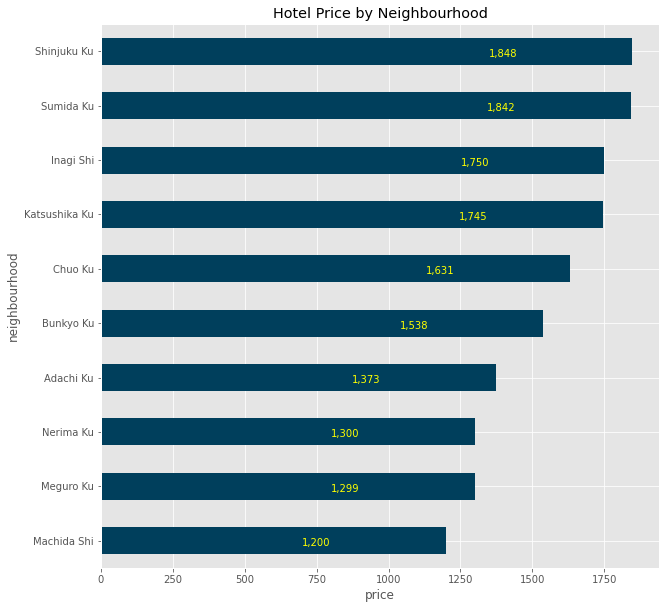

In [24]:
grouped_hotel15.plot(kind='barh', figsize=(10, 10), color='#003f5c')
plt.xlabel('price')
plt.title('Hotel Price by Neighbourhood')


 # annotate value labels to each country
for index, value in enumerate(grouped_hotel15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 500 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 500, index - 0.10), color='yellow')

plt.show()


In [25]:
Tokyo_hotel_price = Hotel_cheapest.drop(['latitude','longitude','name','neighbourhood'],1)
Tokyo_hotel_price.head()

,price
1969,737
1958,810
1966,840
1961,880
1963,880


In [26]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(Tokyo_hotel_price)
labels = k_means.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [27]:
Hotel_cheapest["Labels"] = labels
Hotel_cheapest.head(10)

,name,neighbourhood,latitude,longitude,price,Labels
1969,Poket Wi-Fi 509 GK,Sumida Ku,35.69405,139.81376,737,1
1958,Poket Wi-Fi 402 GK,Sumida Ku,35.69506,139.81293,810,1
1966,Poket Wi-Fi 506 GK,Sumida Ku,35.69485,139.81236,840,1
1961,Poket Wi-Fi 501 GK,Sumida Ku,35.69388,139.81217,880,1
1963,Poket Wi-Fi 503 GK,Sumida Ku,35.69540,139.81297,880,1
1962,Poket Wi-Fi 502 GK,Sumida Ku,35.69383,139.81346,910,1
1989,Poket Wi-Fi 401 GK,Sumida Ku,35.69493,139.81418,980,1
10865,Enjoy your private time ｰ Nest Inn Tabata A -,Arakawa Ku,35.73542,139.76562,1071,1
10351,Enjoy your private time - Nest Inn Tabata B -,Kita Ku,35.73620,139.76439,1082,1
1765,8 mins to Station/private room with TV★S3-3,Adachi Ku,35.80921,139.76721,1100,1


In [28]:
Hotel_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Hotel_cheapest['latitude'], Hotel_cheapest['longitude'], Hotel_cheapest['price'], Hotel_cheapest['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Hotel_clusters)
       
Hotel_clusters

#### Based on the map, all areas have cheap accommodation. But there is one area that is classified as cheap accommodation which is shown in purple, namely Machida.

## ANALYSIS OF NEIGHBORHOOD BASED ON FOURSQUARE API

In [29]:
CLIENT_ID = 'LGBK1J3QAKLBF04KM2OUGWUVXE2420DCLLUWPF2SMY3QE4AS' # your Foursquare ID
CLIENT_SECRET = 'VV3QEH2WFLTRM2EXHANYDI0OAB0LOLGBAFDX2ONGMNYRCYDX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LGBK1J3QAKLBF04KM2OUGWUVXE2420DCLLUWPF2SMY3QE4AS
CLIENT_SECRET:VV3QEH2WFLTRM2EXHANYDI0OAB0LOLGBAFDX2ONGMNYRCYDX


### Searcing venues in the neighbourhood

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
# type your answer here
Tokyo_venues = getNearbyVenues(names=Tokyo_neigh['neighbourhood'],
                                   latitudes=Tokyo_neigh['Latitude'],
                                   longitudes=Tokyo_neigh['Longitude']
                                  )

Sumida Ku
Kita Ku
Shinjuku Ku
Shibuya Ku
Setagaya Ku
Adachi Ku
Katsushika Ku
Meguro Ku
Toshima Ku
Koto Ku
Shinagawa Ku
Minato Ku
Suginami Ku
Akishima Shi
Bunkyo Ku
Taito Ku
Itabashi Ku
Edogawa Ku
Arakawa Ku
Machida Shi
Higashimurayama Shi
Chuo Ku
Nerima Ku
Kokubunji Shi
Hino Shi
Mitaka Shi
Nakano Ku
Hachioji Shi
Musashino Shi
Koganei Shi
Ota Ku
Akiruno Shi
Chiyoda Ku
Kodaira Shi
Fuchu Shi
Fussa Shi
Tama Shi
Komae Shi
Chofu Shi
Nishitokyo Shi
Hinohara Mura
Ome Shi
Kunitachi Shi
Higashiyamato Shi
Okutama Machi
Hamura Shi
Tachikawa Shi
Inagi Shi
Musashimurayama Shi


In [32]:
print(Tokyo_venues.shape)
Tokyo_venues.head()

(2269, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sumida Ku,35.710707,139.80154,Suke6 Diner / Manufacture,35.712273,139.799319,Café
1,Sumida Ku,35.710707,139.80154,塩パン屋 パン・メゾン,35.708709,139.802399,Bakery
2,Sumida Ku,35.710707,139.80154,MONTEE 13 (モンティ 13),35.708663,139.801741,Thai Restaurant
3,Sumida Ku,35.710707,139.80154,ポポンデッタ with 東武鉄道ギャラリー,35.711852,139.798468,Hobby Shop
4,Sumida Ku,35.710707,139.80154,Authentique (オーセンティック),35.711249,139.797825,Vietnamese Restaurant


In [33]:
Tokyo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adachi Ku,22,22,22,22,22,22
Akiruno Shi,22,22,22,22,22,22
Akishima Shi,13,13,13,13,13,13
Arakawa Ku,16,16,16,16,16,16
Bunkyo Ku,100,100,100,100,100,100
Chiyoda Ku,100,100,100,100,100,100
Chofu Shi,100,100,100,100,100,100
Chuo Ku,100,100,100,100,100,100
Edogawa Ku,33,33,33,33,33,33


In [34]:
print('There are {} uniques categories.'.format(len(Tokyo_venues['Venue Category'].unique())))

There are 245 uniques categories.


## Analize Venues in Neighbourhood

In [35]:
# one hot encoding
Tokyo_onehot = pd.get_dummies(Tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tokyo_onehot['Neighborhood'] = Tokyo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tokyo_onehot.columns[-1]] + list(Tokyo_onehot.columns[:-1])
Tokyo_onehot = Tokyo_onehot[fixed_columns]

Tokyo_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo
0,Sumida Ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sumida Ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sumida Ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sumida Ku,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sumida Ku,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
Tokyo_grouped = Tokyo_onehot.groupby('Neighborhood').mean().reset_index()
Tokyo_grouped

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo
0,Adachi Ku,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,Akiruno Shi,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,Akishima Shi,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,Arakawa Ku,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,Bunkyo Ku,0.000000,0.00,0.00,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.00000
5,Chiyoda Ku,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00000
6,Chofu Shi,0.020000,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.00000
7,Chuo Ku,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.010000,0.000000,0.030000,0.00000
8,Edogawa Ku,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,Fuchu Shi,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010526,...,0.000000,0.000000,0.000000,0.010526,0.000000,0.010526,0.000000,0.000000,0.000000,0.00000


In [37]:
num_top_venues = 5

for hood in Tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =Tokyo_grouped[Tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(int)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi Ku----
                   venue  freq
0                    ATM     0
1        Paintball Field     0
2                   Park     0
3            Pastry Shop     0
4  Performing Arts Venue     0


----Akiruno Shi----
                   venue  freq
0                    ATM     0
1        Paintball Field     0
2                   Park     0
3            Pastry Shop     0
4  Performing Arts Venue     0


----Akishima Shi----
                   venue  freq
0                    ATM     0
1        Paintball Field     0
2                   Park     0
3            Pastry Shop     0
4  Performing Arts Venue     0


----Arakawa Ku----
                   venue  freq
0                    ATM     0
1        Paintball Field     0
2                   Park     0
3            Pastry Shop     0
4  Performing Arts Venue     0


----Bunkyo Ku----
                   venue  freq
0                    ATM     0
1        Paintball Field     0
2                   Park     0
3            Pastry Shop    

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tokyo_grouped['Neighborhood']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi Ku,Convenience Store,Grocery Store,Kids Store,BBQ Joint,Deli / Bodega,Ramen Restaurant,Pharmacy,Bus Stop,Steakhouse,Furniture / Home Store
1,Akiruno Shi,Ramen Restaurant,Sushi Restaurant,Convenience Store,Intersection,Chinese Restaurant,Udon Restaurant,Garden Center,Steakhouse,Grocery Store,Thrift / Vintage Store
2,Akishima Shi,Convenience Store,Intersection,Donburi Restaurant,Park,BBQ Joint,Motorcycle Shop,Ramen Restaurant,Zoo,Food & Drink Shop,Fishing Store
3,Arakawa Ku,Convenience Store,Bus Stop,Park,Tram Station,Chinese Restaurant,Concert Hall,Café,Asian Restaurant,Intersection,Italian Restaurant
4,Bunkyo Ku,Baseball Stadium,Ramen Restaurant,Convenience Store,Coffee Shop,Theme Park Ride / Attraction,Japanese Restaurant,Italian Restaurant,BBQ Joint,Concert Hall,Bakery


## Cluster Neighborhoods

In [40]:
from sklearn.preprocessing import StandardScaler
Tokyo_grouped_clustering = Tokyo_grouped.drop('Neighborhood', 1)
X = Tokyo_grouped_clustering.values[:,1:]
X = np.nan_to_num(X)
Tokyo_grouped_clustering = StandardScaler().fit_transform(X)
Tokyo_grouped_clustering

array([[-0.14433757, -0.14433757, -0.22969355, ..., -0.14433757,
        -0.44806705, -0.14433757],
       [-0.14433757, -0.14433757, -0.22969355, ..., -0.14433757,
        -0.44806705, -0.14433757],
       [-0.14433757, -0.14433757, -0.22969355, ..., -0.14433757,
        -0.44806705, -0.14433757],
       ...,
       [-0.14433757, -0.14433757,  6.01536526, ..., -0.14433757,
         1.05616237, -0.14433757],
       [-0.14433757, -0.14433757, -0.22969355, ..., -0.14433757,
        -0.44806705, -0.14433757],
       [-0.14433757, -0.14433757, -0.22969355, ..., -0.14433757,
         0.7811957 , -0.14433757]])

In [41]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40] 

array([4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 0, 4], dtype=int32)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Tokyo_merged = Tokyo_neigh

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Tokyo_merged = Tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighbourhood')

Tokyo_merged.head() # check the last columns!

,neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sumida Ku,35.710707,139.801540,2,Japanese Restaurant,Convenience Store,Soba Restaurant,Wagashi Place,Café,Unagi Restaurant,Ramen Restaurant,Coffee Shop,Yoshoku Restaurant,Park
1,Kita Ku,35.752839,139.733519,4,Convenience Store,Ramen Restaurant,Intersection,Park,Café,Theater,Japanese Restaurant,Pizza Place,Garden,Takoyaki Place
2,Shinjuku Ku,35.693798,139.703440,3,Sake Bar,Ramen Restaurant,BBQ Joint,Bar,Rock Club,Pub,Japanese Restaurant,Bookstore,Noodle House,Thai Restaurant
3,Shibuya Ku,35.663687,139.697791,5,Café,Record Shop,Nightclub,Rock Club,Chinese Restaurant,Ramen Restaurant,Sake Bar,Concert Hall,BBQ Joint,Seafood Restaurant
4,Setagaya Ku,35.646544,139.653222,4,Convenience Store,Café,Intersection,Bakery,Sake Bar,Ramen Restaurant,Soba Restaurant,Tea Room,Bistro,Szechuan Restaurant


In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_merged['Latitude'], Tokyo_merged['Longitude'], Tokyo_merged['neighbourhood'], Tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### **Examine Clusters**

#Now you can see the result of clustering neighborhood by venue. You can choose which location to live in, and what interesting venues are nearby.

### Cluster 1-5

In [44]:
Tokyo_merged.loc[Tokyo_merged['Cluster Labels'] == 0, Tokyo_merged.columns[[0] + list(range(4, Tokyo_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Ota Ku,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Sake Bar,Sushi Restaurant,Bed & Breakfast,Café,Tonkatsu Restaurant,Vietnamese Restaurant,Steakhouse


In [45]:
Tokyo_merged.loc[Tokyo_merged['Cluster Labels'] == 1, Tokyo_merged.columns[[0] + list(range(4, Tokyo_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Higashimurayama Shi,Convenience Store,Japanese Family Restaurant,Sake Bar,Park,Grocery Store,Thrift / Vintage Store,Fish Market,Tunnel,Ramen Restaurant,Supermarket


In [46]:
Tokyo_merged.loc[Tokyo_merged['Cluster Labels'] == 2, Tokyo_merged.columns[[0] + list(range(4, Tokyo_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sumida Ku,Japanese Restaurant,Convenience Store,Soba Restaurant,Wagashi Place,Café,Unagi Restaurant,Ramen Restaurant,Coffee Shop,Yoshoku Restaurant,Park
7,Meguro Ku,Japanese Restaurant,Ramen Restaurant,BBQ Joint,Café,Italian Restaurant,Chinese Restaurant,Coffee Shop,Bakery,French Restaurant,Japanese Curry Restaurant
8,Toshima Ku,Ramen Restaurant,Café,Japanese Restaurant,BBQ Joint,Sake Bar,Coffee Shop,Steakhouse,Pet Café,Sushi Restaurant,Udon Restaurant
9,Koto Ku,Convenience Store,Sake Bar,Coffee Shop,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Park,Café,Bed & Breakfast,Donburi Restaurant
11,Minato Ku,Japanese Restaurant,Chinese Restaurant,Ramen Restaurant,BBQ Joint,Tonkatsu Restaurant,Historic Site,Hotel,Convenience Store,Park,Thai Restaurant
12,Suginami Ku,Ramen Restaurant,Italian Restaurant,Dumpling Restaurant,Sake Bar,Café,Soba Restaurant,Bus Stop,Park,Gym / Fitness Center,Tonkatsu Restaurant
14,Bunkyo Ku,Baseball Stadium,Ramen Restaurant,Convenience Store,Coffee Shop,Theme Park Ride / Attraction,Japanese Restaurant,Italian Restaurant,BBQ Joint,Concert Hall,Bakery
15,Taito Ku,Sake Bar,Convenience Store,Ramen Restaurant,Soba Restaurant,Chinese Restaurant,Coffee Shop,Bath House,Concert Hall,Hotel,Japanese Restaurant
21,Chuo Ku,Japanese Restaurant,Soba Restaurant,Ramen Restaurant,Sushi Restaurant,Coffee Shop,Italian Restaurant,Yoshoku Restaurant,Kaiseki Restaurant,Convenience Store,Wine Bar
22,Nerima Ku,Ramen Restaurant,Convenience Store,Sake Bar,Grocery Store,Drugstore,Chinese Restaurant,BBQ Joint,Café,Takoyaki Place,Boutique


In [47]:
Tokyo_merged.loc[Tokyo_merged['Cluster Labels'] == 3, Tokyo_merged.columns[[0] + list(range(4, Tokyo_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Shinjuku Ku,Sake Bar,Ramen Restaurant,BBQ Joint,Bar,Rock Club,Pub,Japanese Restaurant,Bookstore,Noodle House,Thai Restaurant


In [48]:
Tokyo_merged.loc[Tokyo_merged['Cluster Labels'] == 4, Tokyo_merged.columns[[0] + list(range(4, Tokyo_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kita Ku,Convenience Store,Ramen Restaurant,Intersection,Park,Café,Theater,Japanese Restaurant,Pizza Place,Garden,Takoyaki Place
4,Setagaya Ku,Convenience Store,Café,Intersection,Bakery,Sake Bar,Ramen Restaurant,Soba Restaurant,Tea Room,Bistro,Szechuan Restaurant
5,Adachi Ku,Convenience Store,Grocery Store,Kids Store,BBQ Joint,Deli / Bodega,Ramen Restaurant,Pharmacy,Bus Stop,Steakhouse,Furniture / Home Store
6,Katsushika Ku,Supermarket,Intersection,Bus Stop,Convenience Store,Sushi Restaurant,Discount Store,Japanese Restaurant,Drugstore,Automotive Shop,Clothing Store
10,Shinagawa Ku,Convenience Store,Japanese Restaurant,Donburi Restaurant,Ramen Restaurant,Steakhouse,Italian Restaurant,Coffee Shop,BBQ Joint,Theater,Park
13,Akishima Shi,Convenience Store,Intersection,Donburi Restaurant,Park,BBQ Joint,Motorcycle Shop,Ramen Restaurant,Zoo,Food & Drink Shop,Fishing Store
16,Itabashi Ku,Convenience Store,Ramen Restaurant,Chinese Restaurant,Shopping Mall,Grocery Store,Japanese Restaurant,Zoo,Bus Stop,Café,Dessert Shop
17,Edogawa Ku,Convenience Store,Grocery Store,Drugstore,Concert Hall,Donburi Restaurant,Bowling Alley,Rental Car Location,Electronics Store,Cultural Center,Clothing Store
18,Arakawa Ku,Convenience Store,Bus Stop,Park,Tram Station,Chinese Restaurant,Concert Hall,Café,Asian Restaurant,Intersection,Italian Restaurant
19,Machida Shi,Convenience Store,Intersection,Deli / Bodega,Rental Car Location,Music Venue,Trail,Park,Bus Station,Restaurant,Bus Stop


In [49]:
Tokyo_merged.loc[Tokyo_merged['Cluster Labels'] == 5, Tokyo_merged.columns[[0] + list(range(4, Tokyo_merged.shape[1]))]]

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Shibuya Ku,Café,Record Shop,Nightclub,Rock Club,Chinese Restaurant,Ramen Restaurant,Sake Bar,Concert Hall,BBQ Joint,Seafood Restaurant


## RESULT AND DISCUSSION

1. I try to use the neighborhood data from Wikipedia, my assumption the Airbnb data will give me the same data of neighborhood then I could merge these data. Unfortunately, the neighborhood of Wikipedia and Airbnb is different, so I consider to use one of them. I prefer to use Airbnb data. In real life, data scientists have actually encountered confusing source data.

2. Based on the above analysis, the top 10 cheapest neighborhood to stay on vacation are:\
    * Machida Shi      1200
    * Meguro Ku        1299
    * Nerima Ku        1300
    * Adachi Ku        1373
    * Bunkyo Ku        1538
    * Chuo Ku          1631
    * Katsushika Ku    1745
    * Inagi Shi        1750
    * Sumida Ku        1842
    * Shinjuku Ku      1848
    \
    \
From these neighborhoods, Machida and Inagi are the farthest cities from the airport so it's reasonable for the cheap price. Others location is nearby the center of Tokyo, If you want to get easy transportation, Shinjuku is the most popular then others. Based on Wikipedia, Shinjuku is a special ward in Tokyo, Japan. It is a major commercial and administrative center, housing the northern half of the busiest railway station in the world (Shinjuku Station) and the Tokyo Metropolitan Government Building, the administration center for the government of Tokyo.Sinjuku is famous for its nightlife. After stay at Shinjuku, you can move to Sumida. Sumida is famous for top tourist locations such as Japan Skytree, Sensoji, Edo-Tokyo Museum and e.t.c.


3. You can see a map of the hotel cluster, the purple color is the cheap hotel, the green is medium and the red is the most expensive.

4. I have clustered neighborhoods based on the venues. We observed the venues of cluster 1 until cluster 6, and let us discuss the result:
in my opinion:
    * cluster-1, Ota Ku has characteristic culinary traveling.
    * cluster-2, Higashimurayama Shi has characteristic natural tourism.
    * cluster-3, Sumida Ku, Meguro Ku, and e.t.c have characteristic complete tour.
    * cluster-4, Shinjuku has characteristic nightlife tour.
    * cluster-5, Kita-Ku, Adachi-Ku, and e.t.c is where residents live, not a tourist place
    * cluster-6, Shibuya Ku has characteristic nightlife tour.
    \
do you agree with my opinion based on the K-means clustering result from above?




Japan has the Japanese language, it is not easy to know the neighborhood name because we have difficulty reading Japanese. Maybe it's a factor that concludes the different name of the neighborhood between Wikipedia and Airbnb. The next time we could merge the data with the haversine formula to get more insight into Tokyo.

## Conclusion

If you are a young person and backpacker, you would love to travel the world. One of them is Tokyo which is very famous. So we have to manage the budget properly. One of the cost savings that we can do is choosing an inexpensive place to stay.

As the result, people are visiting Tokyo for traveling. For this reason, people can be saving the cost of their vacation through their access to the platforms where such information is provided.

Not only for travelers but also major can manage the city more regularly of hotel pricing by using similar data analysis types or platforms.